<a href="https://colab.research.google.com/github/revanthmadasu/LifestyleWellbeing/blob/exploratory-data-analysis/LifestyleWellbeing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the data

In [58]:
dataset = pd.read_csv('https://raw.githubusercontent.com/revanthmadasu/LifestyleWellbeing/master/Wellbeing_and_lifestyle_data_Kaggle.csv')

dataset = dataset.drop(10005)
dataset['DAILY_STRESS'] = dataset['DAILY_STRESS'].replace(['0','1','2','3','4','5'], [0,1,2,3,4,5])
dataset.head()

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Exploratory Data Analysis

Checking for null data

In [3]:
dataset.isnull().sum()

Timestamp                  0
FRUITS_VEGGIES             0
DAILY_STRESS               0
PLACES_VISITED             0
CORE_CIRCLE                0
SUPPORTING_OTHERS          0
SOCIAL_NETWORK             0
ACHIEVEMENT                0
DONATION                   0
BMI_RANGE                  0
TODO_COMPLETED             0
FLOW                       0
DAILY_STEPS                0
LIVE_VISION                0
SLEEP_HOURS                0
LOST_VACATION              0
DAILY_SHOUTING             0
SUFFICIENT_INCOME          0
PERSONAL_AWARDS            0
TIME_FOR_PASSION           0
WEEKLY_MEDITATION          0
AGE                        0
GENDER                     0
WORK_LIFE_BALANCE_SCORE    0
dtype: int64

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15971 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15971 non-null  object 
 1   FRUITS_VEGGIES           15971 non-null  int64  
 2   DAILY_STRESS             15971 non-null  object 
 3   PLACES_VISITED           15971 non-null  int64  
 4   CORE_CIRCLE              15971 non-null  int64  
 5   SUPPORTING_OTHERS        15971 non-null  int64  
 6   SOCIAL_NETWORK           15971 non-null  int64  
 7   ACHIEVEMENT              15971 non-null  int64  
 8   DONATION                 15971 non-null  int64  
 9   BMI_RANGE                15971 non-null  int64  
 10  TODO_COMPLETED           15971 non-null  int64  
 11  FLOW                     15971 non-null  int64  
 12  DAILY_STEPS              15971 non-null  int64  
 13  LIVE_VISION              15971 non-null  int64  
 14  SLEEP_HOURS           

In [34]:
dataset.describe()

,FRUITS_VEGGIES,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,FLOW,DAILY_STEPS,LIVE_VISION,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,WORK_LIFE_BALANCE_SCORE
count,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000
mean,2.922672,5.233235,5.508296,5.616179,6.474047,4.000689,2.715171,1.410619,5.745977,3.194477,5.703588,3.752176,7.042953,2.898441,2.931000,1.728946,5.711289,3.326279,6.233611,666.750510
std,1.442739,3.311847,2.840287,3.241937,3.086643,2.755912,1.851556,0.491962,2.624179,2.357285,2.891102,3.231083,1.199053,3.691867,2.676341,0.444518,3.089540,2.729128,3.016479,45.021103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,480.000000
25%,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,1.000000,3.000000,1.000000,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,636.000000
50%,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,3.000000,5.000000,3.000000,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,7.000000,667.700000
75%,4.000000,8.000000,8.000000,9.500000,10.000000,6.000000,5.000000,2.000000,8.000000,5.000000,8.000000,5.000000,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,698.500000
max,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,820.200000


### Visualizing Data

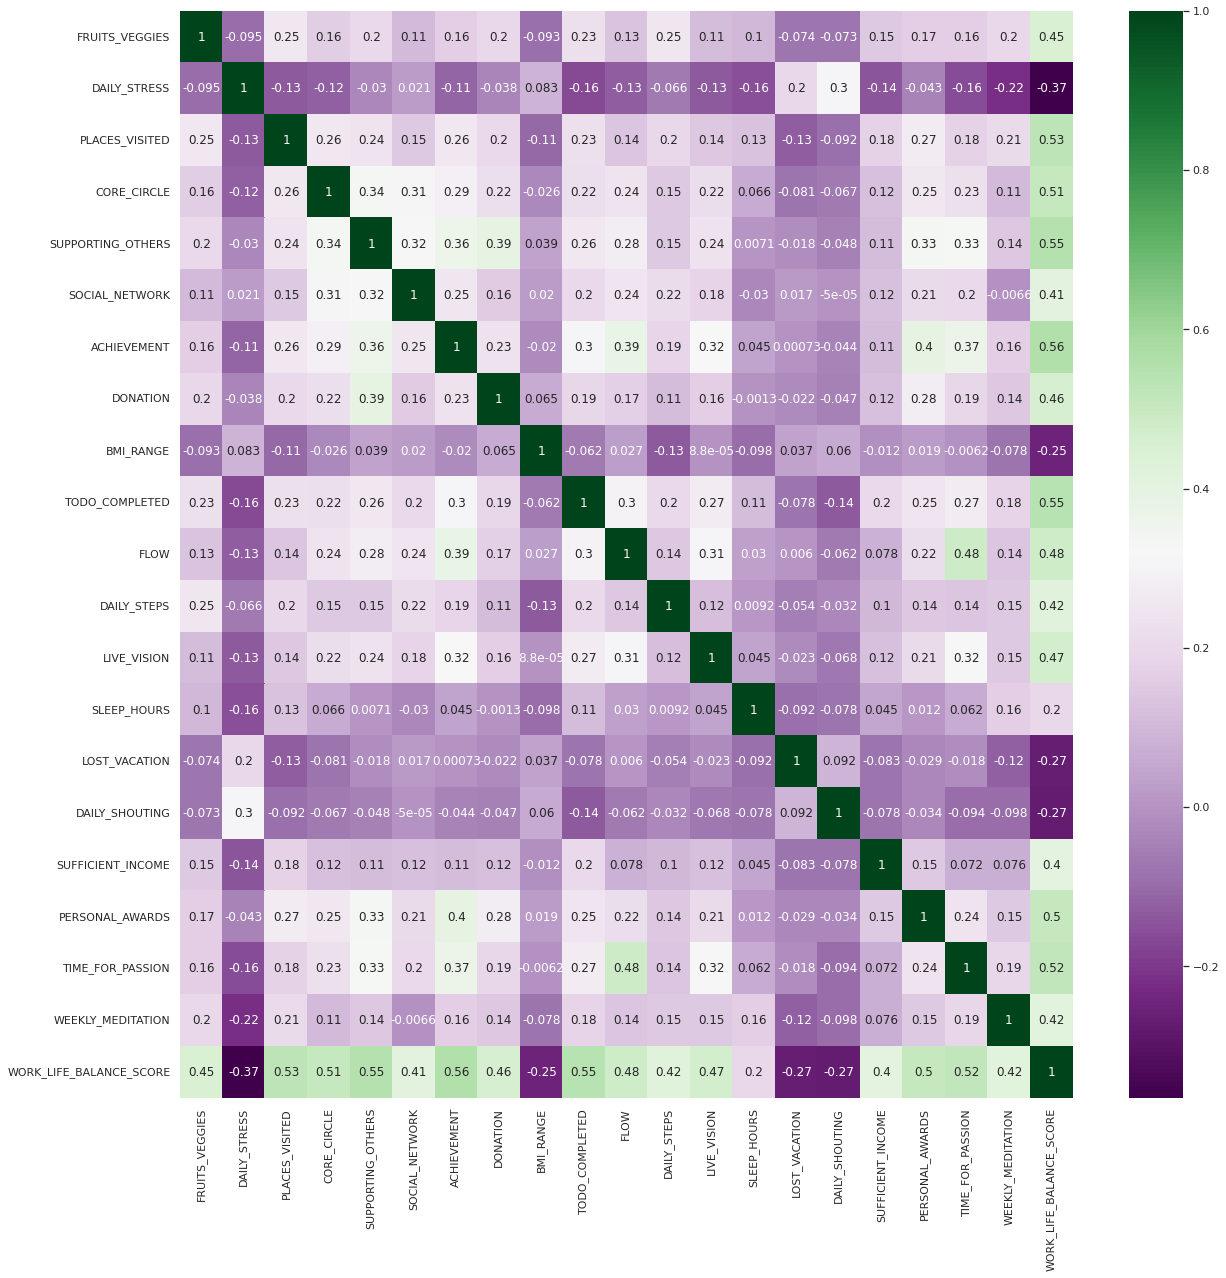

In [59]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.diverging_palette(145, 300, s=60, as_cmap=True)
# sns.heatmap(dataset.corr())
sns.heatmap(dataset.corr(),cbar=True,annot=True,cmap="PRGn")


Comparing work life balance with gender and age

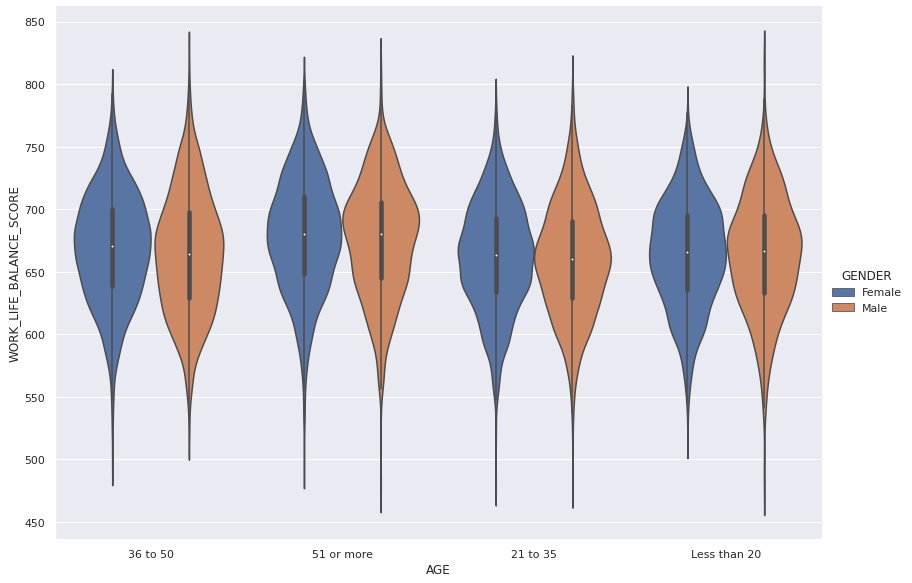

In [43]:
sns.catplot(data=dataset, x="AGE", y="WORK_LIFE_BALANCE_SCORE", hue="GENDER", kind="violin", height=8.27, aspect=11.7/8.27)

How vacation impacts on Work Life Balance

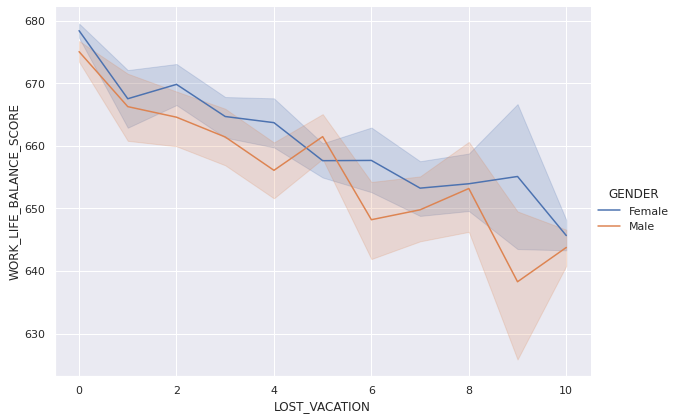

In [53]:
sns.relplot(data=dataset, x="LOST_VACATION", y="WORK_LIFE_BALANCE_SCORE", kind="line", hue="GENDER", height=6, aspect=11.7/8.27)

Meditation Impact on Work Life Balance

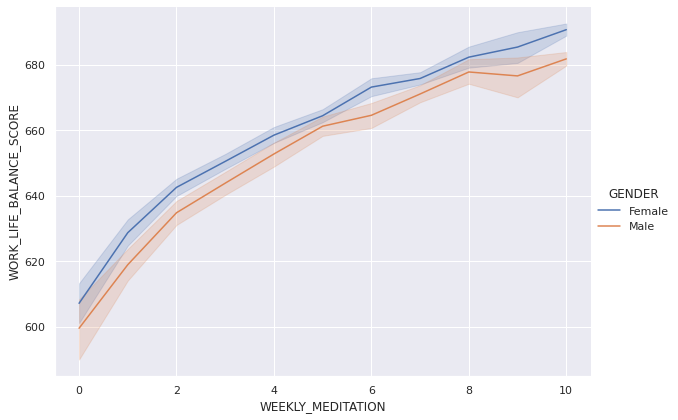

In [57]:
sns.relplot(data=dataset, x="WEEKLY_MEDITATION", y="WORK_LIFE_BALANCE_SCORE", kind="line", hue="GENDER", height=6, aspect=11.7/8.27)

Meditation impact on Daily Stress

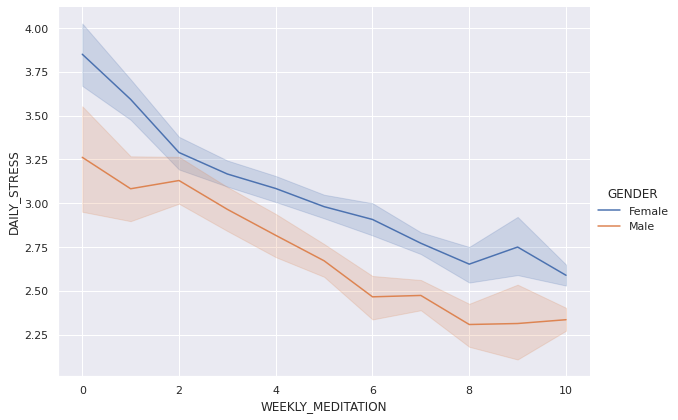

In [60]:
sns.relplot(data=dataset, x="WEEKLY_MEDITATION", y="DAILY_STRESS", kind="line", hue="GENDER", height=6, aspect=11.7/8.27)

Time for passion impact on flow

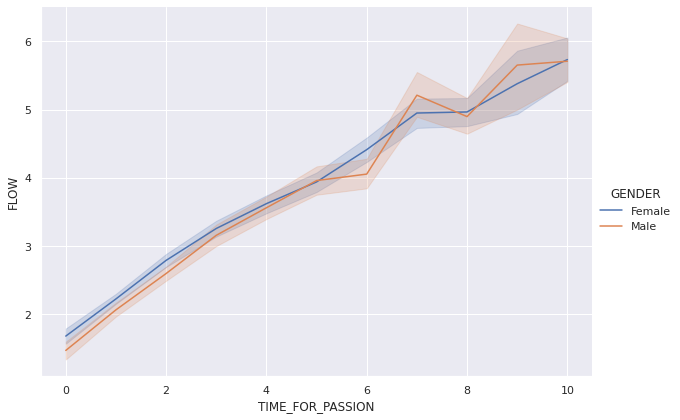

In [62]:
sns.relplot(data=dataset, x="TIME_FOR_PASSION", y="FLOW", kind="line", hue="GENDER", height=6, aspect=11.7/8.27)

# Converting categorial data into numerical

Understanding which objects to convert

In [ ]:
object_dataset = dataset.select_dtypes(include=['object']).copy()
object_dataset.head()

,Timestamp,DAILY_STRESS,AGE,GENDER
0,7/7/15,2,36 to 50,Female
1,7/7/15,3,36 to 50,Female
2,7/7/15,3,36 to 50,Female
3,7/7/15,3,51 or more,Female
4,7/7/15,1,51 or more,Female


Converting Timestamp using label encoding. "Finding and replacing" method would take forever. "One-hot encoder" method would creat a lot more unnecessary columns

In [ ]:
dataset['Timestamp'] = dataset['Timestamp'].astype('category')
dataset['Timestamp'] = dataset['Timestamp'].cat.codes
dataset.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,5606,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,5606,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,5606,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,5606,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,5606,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


AGE is converted to numeric variable. Since the data is given as categorical variable we should convert into numeric values that can be comparable (because age is comparable unlike gender)

In [ ]:
dataset['AGE'] = dataset['AGE'].replace(['21 to 35', '36 to 50', '51 or more', 'Less than 20'],[(21+35)/2, (36+50)/2, (51+80)/2, (20/2)])

Using get_dummies method for 'GENDER' category

In [ ]:
dummy_col_df = pd.get_dummies(dataset, columns = ['GENDER'])
dummy_col_df.columns

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'WORK_LIFE_BALANCE_SCORE', 'GENDER_Female',
       'GENDER_Male'],
      dtype='object')

Shifting 'WORK_LIFE_BALANCE_SCORE' to the right

In [ ]:
dummy_col_df = dummy_col_df[['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER_Female',
       'GENDER_Male', 'WORK_LIFE_BALANCE_SCORE']]
X = dummy_col_df.iloc[:, :-1].values
y = dummy_col_df.iloc[:, -1].values

In [ ]:
print(X[0,:])

[5607 3 2 2 5 0 5 2 0 1 6 4 5 0 7 5 5 1 4 0 5 0 1 0 0 1 0]


In [ ]:
print(X)

[[5607 3 2 ... 0 1 0]
 [5607 2 3 ... 0 1 0]
 [5607 2 3 ... 0 1 0]
 ...
 [3054 4 3 ... 0 0 1]
 [3055 1 1 ... 0 1 0]
 [3056 5 4 ... 0 1 0]]


In [ ]:
print(y)

[609.5 655.6 631.6 ... 716.6 682.  651.4]


# Missing Data

In [ ]:
missing_data = dummy_col_df.isnull()
missing_data
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("x")

Timestamp
False    15971
Name: Timestamp, dtype: int64
x
FRUITS_VEGGIES
False    15971
Name: FRUITS_VEGGIES, dtype: int64
x
DAILY_STRESS
False    15971
Name: DAILY_STRESS, dtype: int64
x
PLACES_VISITED
False    15971
Name: PLACES_VISITED, dtype: int64
x
CORE_CIRCLE
False    15971
Name: CORE_CIRCLE, dtype: int64
x
SUPPORTING_OTHERS
False    15971
Name: SUPPORTING_OTHERS, dtype: int64
x
SOCIAL_NETWORK
False    15971
Name: SOCIAL_NETWORK, dtype: int64
x
ACHIEVEMENT
False    15971
Name: ACHIEVEMENT, dtype: int64
x
DONATION
False    15971
Name: DONATION, dtype: int64
x
BMI_RANGE
False    15971
Name: BMI_RANGE, dtype: int64
x
TODO_COMPLETED
False    15971
Name: TODO_COMPLETED, dtype: int64
x
FLOW
False    15971
Name: FLOW, dtype: int64
x
DAILY_STEPS
False    15971
Name: DAILY_STEPS, dtype: int64
x
LIVE_VISION
False    15971
Name: LIVE_VISION, dtype: int64
x
SLEEP_HOURS
False    15971
Name: SLEEP_HOURS, dtype: int64
x
LOST_VACATION
False    15971
Name: LOST_VACATION, dtype: int64
x
DAILY_SHOU

# Data Normalization 

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scaled_X = sc.fit_transform(X)
scaled_X[0]

array([ 1.02351069,  0.05359948, -0.57881948, -0.97629415, -0.1789651 ,
       -1.73240727, -0.47757158, -0.72598514, -1.46647256, -0.83468321,
        0.09680395,  0.34172696, -0.24337079, -1.1613115 , -0.03582342,
        0.56925794,  0.77309453, -1.63990996, -0.55391509, -1.21884478,
       -0.40896998,  0.27459299,  0.78746778, -0.78746778])